## KING COUNTY HOUSE SALES ANALYSIS

STUDENT NAMES:
1. MICHEAL ARITA
2. MERCY SILALI
3. WAFULA SIMIYU
4. JEFFREY KANYI

#### INTRODUCTION
Housing is a major issue that seems to increase with the ever growing population. People not only search for secure but comfortable housing with various factors to consider to ensure proper living. However, prices in the housing sector fluctuate over time, being influenced by various factors such as size, location, number of bedrooms, year of renovation, grade, and number of floors, just to mention a few. Having  the ability to predict the prices of houses basing on various factors can be vital to real estate agencies and other stakeholders in the real estate industry.

#### PROBLEM STATEMENT
House prices are influenced by multiple factors, making it challenging to predict prices accurately.
Accurate predictions can assist in better pricing strategies and investment decisions.

#### OBJECTIVES
1. To explore and understant the King County House Sales dataset's structure and content.
2. To perform data cleaning and data wrangling to prepare the dataset for analysis.
3. To perform exploratory data analysis to understand the data and identify patterns and trends.
4. To build a regression model to predict the house prices based on the different factors.
5. To investigate the relationship between the house prices and the different factors such as the size of the of the house among others
6. Price Prediction: Create a model that can accurately forecast the prices of houses based on features such as year built, the size of the house among other features.

#### METHODOLOGY
1. Business understanding
2. Data understanding
3. Data preparation
4. Data modelling
5. Evaluation
6. Model interpretation and Recommendations.

#### DATA
The dataset contains information about houses sold in King County between the years 2014 and 2015. The dataset is 'kc_house_data.csv'
The column names are further detail in 'column_names.md' dataset.

#### Loading the dataset
Here, the necessary libraries are imported.

In [41]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [42]:
#loading the dataset
df = pd.read_csv(r"C:\Users\hp\Documents\practice-project\data\kc_house_data.csv")

#viewing the dataset
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### Data Preparation.
Here we explore the data types and the overall structure of the as we prepare it for exploratory data analysis and Modelling.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [44]:
df.shape

(21597, 21)

In [45]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset contains 21597 rows and 21 columns.

#### DATA CLEANING
In this part we drop any identical rows in the dataset. This is to avoid any skewed results in the nalysis. We are also dropping columns that are of no use in the analysis process to avoid irrelevance, redudancy and any unusable columns. 

In [46]:
#dropping dupliates
df.drop_duplicates()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The observation here is that there we no identical rows in the dataset, so it still retains the original shape, 21597 rows and 21 columns.
Below, we drop any irrelevant columns

#### Handling Missing Values
in this section, we will learn how to handle missing values in a dataset. We start by checking the sum of missing values in each column

In [47]:
#checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The yr_renovated has 3842 rows with missing values. We will start by checling the overall proportion of the missing values the column so as to decide on what approach to use inorder to handle the missing values.

In [48]:
#checking for the percentage of missing values in the 'yr_renovated' column
fill_values = {'yr_renovated': df['yr_renovated'].mode()[0],
               'view': df['view'].mode()[0],
               'waterfront': df['waterfront'].mode()[0]}

missing_percentages = {col: (df[col].isna().mean()) * 100 for col in fill_values}
for col, missing_percent in missing_percentages.items():
    print(f'There is {missing_percent:.2f}% of values missing in {col}.')

There is 17.79% of values missing in yr_renovated.
There is 0.29% of values missing in view.
There is 11.00% of values missing in waterfront.


There is percentage of missing values in the 'yr_renovated' columns is 17.79 which represents moderate missing values. We can impute them with the mode as it will not significantly skew the data distribution.
The mode generally represents the most common year and assuming the the missing values cluster around the mode.

In [49]:
#filling the missing values in the "yr_renovated" column with the mode
df = df.apply(lambda col: col.fillna(fill_values[col.name]) if col.name in fill_values else col)

In [50]:
#checking for any missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The cleaned dataset contains 21597 rows and 8 columns. None of them has any missing values.

### EXPLOATORY DATA ANALYSIS

EDA is the first crucial step before creating a linear regression model. The use of Histograms helps us understand the distribution of the data. A heatmap will help us understand the correlation between the predictor variables and target varible. The use of scatter plots will help us determine the overlall distribution of the data

EDA is useful in:
1. Understanding the data in terms of the relationship between features and target variables. It also helps understand the distribution of the data and what variables are influential to our regression model.
2. Identifying any issues such as outliers in the data.

#### SCATTER PLOT
The scatter plot below shows the relationship between the 'price' and the 'sqft_living'

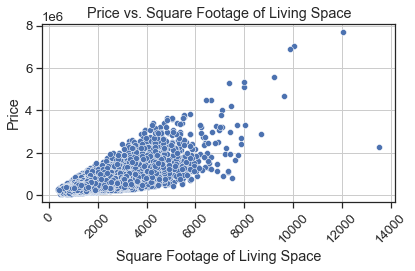

In [51]:
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage of Living Space')
plt.grid(True) 
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The scatter plot above shows a positive correlation between the price and the sqft_living indicating a general upward trend. The larger the sqft_living the higher the price. However there is a also a significant scatter indicating that other factors might also affect the prices. 

### HISTOGRAMS
Histograms are important while building a regression model because they help us understand the following:
1. Understanding the feature distribution by visualizing spread of the data by helping us see if the data follows a normal distribution or if it is skewed on one side. We can also identify outliers in the data that might need further cleaning and investigation.
2. Checking for linear regression assumption that is linearity and normality. In linearity we check if the relationship between the target variable and features is linear. Normality checks if features are normally distributed.

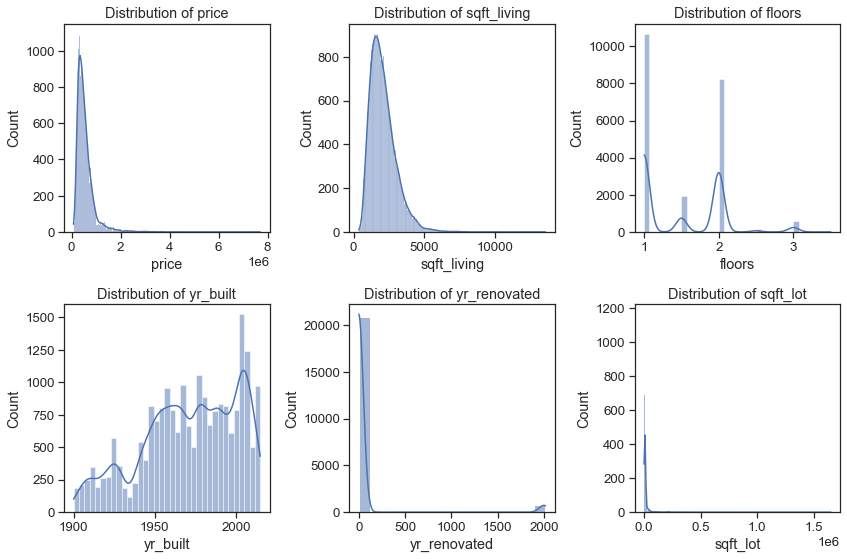

In [52]:
# Histograms for numerical continuous variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['price', 'sqft_living', 'floors', 'yr_built', 'yr_renovated',  'sqft_lot']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Price: The distribution is skewed to the right meaning that most houses are on the lower side of the average prices while a few of the houses are prices significantly higher than the average.
Distribution of sqft_living: The distribution leans towards lower square footage values. It is skewed to the right.
Floors: It appears most houses have one or two floors, with a gradual decrease as the number of floors increases.
yr_built: More houses were built in the recent years. It seems there might be a peak around a certain year, suggesting a period with a higher volume of construction.

#### PAIRPLOT
We use a pairplot to reveal the relationship between multiple variables and it is important in revealing trends, outliers and possible correlations between variables.

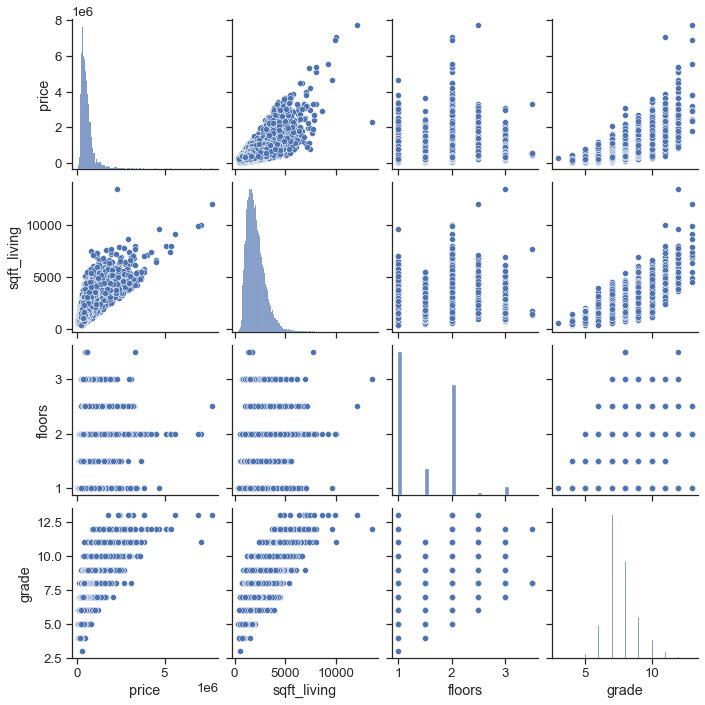

In [53]:
# Pair plot for numerical features
sns.set(style="ticks", color_codes=True, font_scale=1.2)
sns.pairplot(df[['price', 'sqft_living', 'floors', 'grade']])
plt.show()

Price vs. sqft_living: This scatter plot shows a positive correlation between the price of a house and its square footage of living space. As the square footage increases, the price tends to increase as well. There seems to be some spread around the trend, indicating that other factors besides square footage also influence price.
Price vs. floors: There appears to be a weaker positive correlation between price and the number of floors. While some expensive houses have many floors, there are also expensive houses with fewer floors. This suggests that the number of floors might not be as influential on price as square footage.

#### HEATMAP
Values closer to 1: Represent a strong positive correlation, meaning as one variable increases, the other tends to increase as well.
Values closer to -1: Indicate a strong negative correlation, where an increase in one variable is associated with a decrease in the other.
Values close to 0: Suggest little to no linear relationship between the variables.

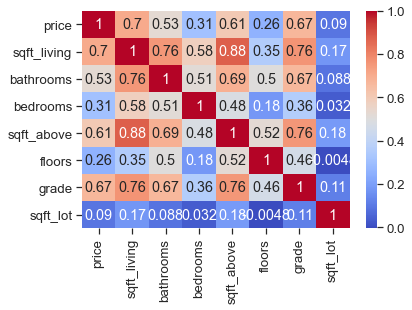

In [54]:
# Correlation matrix
corr_matrix = df[['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'floors', 'grade', 'sqft_lot']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap shows a strong positive correlation with sqft_living and a moderate positive correlation with floors. This suggests houses with larger areas and more floors tend to be more expensive.
There might be a weaker positive correlation with grade.

### BOX PLOT
Box plots are used to show the distribution of a dataset. They are useful for comparing datasets. Box plots are made up of a box, a median line, and whiskers. The box represents the interquartile range (IQR), which is the range of values between the first and third quartiles. The median line is the middle of the dataset. The whiskers extend from the box to the minimum and maximum values in the dataset. The whiskers can be extended to the minimum and maximum values, or they can be extended to the minimum and maximum values that are not outliers. Outliers are values that are more than 1.5 times the IQR above the third quartile or more than 1.5 times the IQR below the first quartile. 
Box plots for bedrooms, condition, and yr_built to identify outliers and understand the distribution of these variabl

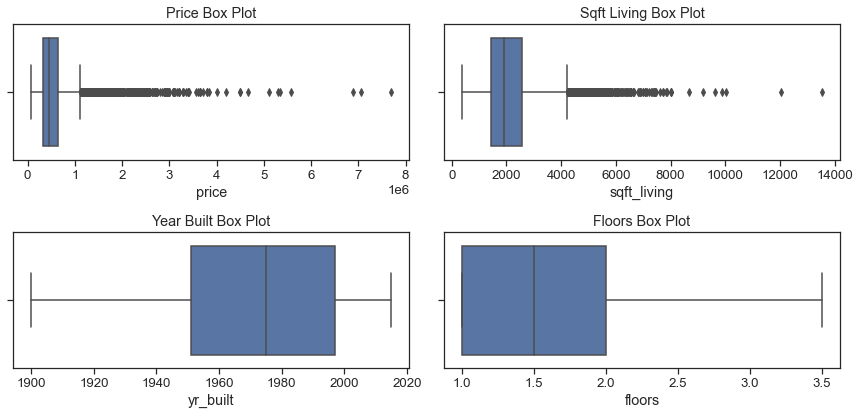

In [55]:
# Box plots for numerical columns
plt.figure(figsize=(12, 6))

# Box plot for price
plt.subplot(2, 2, 1)
sns.boxplot(df['price'])
plt.title('Price Box Plot')

# Box plot for sqft_living
plt.subplot(2, 2, 2)
sns.boxplot(df['sqft_living'])
plt.title('Sqft Living Box Plot')

# Box plot for yr_built
plt.subplot(2, 2, 3)
sns.boxplot(df['yr_built'])
plt.title('Year Built Box Plot')

# Box plot for floors
plt.subplot(2, 2, 4)
sns.boxplot(df['floors'])
plt.title('Floors Box Plot')

plt.tight_layout()
plt.show()

The price and the sqft_living are skewed to the right with many values below the median and fewer outliers above the median values. The yr_built is skewed to the left with more houses being build in the recent years. 
Many houses seem to have 1 to 2 floors with few having more than two.

#### PREPROCESSESING
In this step, preprocessing is important to improve model performance since raw data can be messy. This process also helps in identifying meaningful relationships between variables and helps remove bias.

In [56]:
#checking the data types of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Encoding the categorical columns to allow the model to recognize the relationships between the categorical and numerical features in the data for more accurate predictions. This also ensures  fair comparison as all features are put on a similar numerical scale.

In [57]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
#Handling categorical data
def handle_categorical_features(df):
  categorical_cols = ['condition']
  encoder = OneHotEncoder(sparse=False, drop='first') 
  encoded_features = encoder.fit_transform(df[categorical_cols])
  encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
  df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
  return df

df = handle_categorical_features(df)

In [58]:
#converting date to datetime
df['date'] = pd.to_datetime(df['date'])

Identifying the column with symbols before proceeding to regression analysis, to prevent any inconsistencies.

In [59]:
data_columns = pd.DataFrame({'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_of_house', 'condition_Excellent',
       'condition_Fair', 'condition_Good', 'condition_Poor'})

# List comprehension to find columns with '?'
question_mark_cols = [col for col in df.columns if any(val == '?' for val in df[col])]

print(question_mark_cols) 

['sqft_basement']


Seeing as the correlation of price vs 'sqft_basement' is low, the column was dropped as it is irrelevant to the analysis.

In [60]:
df = df.drop(columns=['sqft_basement', 'date'])
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_2,condition_3,condition_4,condition_5
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,7,...,0.0,98178,47.5112,-122.257,1340,5650,0.0,1.0,0.0,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,...,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1.0,0.0,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,...,0.0,98028,47.7379,-122.233,2720,8062,0.0,1.0,0.0,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,...,0.0,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,...,0.0,98074,47.6168,-122.045,1800,7503,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,8,...,0.0,98103,47.6993,-122.346,1530,1509,0.0,1.0,0.0,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,8,...,0.0,98146,47.5107,-122.362,1830,7200,0.0,1.0,0.0,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,7,...,0.0,98144,47.5944,-122.299,1020,2007,0.0,1.0,0.0,0.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,8,...,0.0,98027,47.5345,-122.069,1410,1287,0.0,1.0,0.0,0.0


Checking the correlation to determine which numerical features have a strong relationship with the price.

In [61]:
#checking the correlation of price and the variables
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264306
view             0.393497
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
condition_2     -0.051432
condition_3      0.006948
condition_4     -0.030759
condition_5      0.057531
Name: price, dtype: float64

'price' has a higher correlation to 'sqft_living'. The correlation is 0.702.

Feature scaling to remove all biases from outliers and provide a balance to all features.

In [62]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['price', 'sqft_living', 'floors', 'zipcode', 'sqft_above', 'bathrooms', 'sqft_lot']  
scaler = StandardScaler()
scaler.fit(df[numerical_features])
df[numerical_features] = scaler.transform(df[numerical_features])
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_2,condition_3,condition_4,condition_5
0,7129300520,-0.866716,3,-1.451073,-0.980652,-0.228182,-0.915552,0.0,0.0,7,...,0.0,1.869645,47.5112,-122.257,1340,5650,0.0,1.0,0.0,0.0
1,6414100192,-0.006252,3,0.174486,0.533369,-0.189739,0.937431,0.0,0.0,7,...,1991.0,0.879210,47.7210,-122.319,1690,7639,0.0,1.0,0.0,0.0
2,5631500400,-0.980773,2,-1.451073,-1.427234,-0.123139,-0.915552,0.0,0.0,6,...,0.0,-0.933473,47.7379,-122.233,2720,8062,0.0,1.0,0.0,0.0
3,2487200875,0.173409,4,1.149821,-0.131057,-0.243878,-0.915552,0.0,0.0,7,...,0.0,1.084772,47.5208,-122.393,1360,5000,0.0,0.0,0.0,1.0
4,1954400510,-0.082471,3,-0.150626,-0.436040,-0.169503,-0.915552,0.0,0.0,8,...,0.0,-0.073850,47.6168,-122.045,1800,7503,0.0,1.0,0.0,0.0


### MODELLING

1. Simple Linear Regression
The simple linear regression below is to show the relationship between the 'price' and the 'sqft_living' of the houses.
The 'price' is the dependent variable(target variable) and the 'sqft_living' is the independent variable(feature).
The model is trained using the 'train' data and the model is tested using the 'test' data. The model is then used to predict the 'price' of the houses in the 'test' data

In [64]:
#importing the necessary library
from statsmodels.formula.api import ols

#model summary
simple_formula = 'price ~ sqft_living'
simple_model = ols(simple_formula, df).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:24:48   Log-Likelihood:                -23317.
No. Observations:               21597   AIC:                         4.664e+04
Df Residuals:                   21595   BIC:                         4.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.246e-17      0.005  -4.63e-15      1.000      -0.010       0.010
sqft_living     0.7019      0.005    144.819      0.000       0.692       0.711
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Performing feature selection, splitting the data, creating and training the model and making predictions

Mean Squared Error: 0.488891126703375
R-squared: 0.49332469237979515


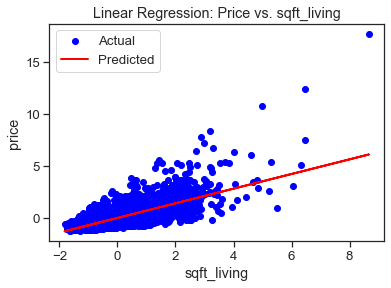

In [66]:

# Define the feature and the target
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression: Price vs. sqft_living')
plt.legend()
plt.show()


#### LOG TRANSFORMATION
Log transformation to help stabilize the variance of the residuals, making them more homoscedastic and improve the reliability of the model's predictions and the validity of statistical tests performed on the regression results.
Plotting a histogram to check for the distribution of price and sqft_living

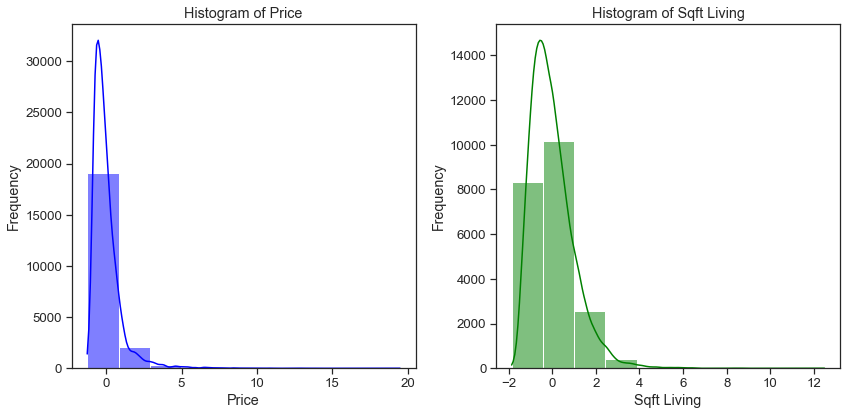

In [67]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=10, color='blue')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for sqft_living
plt.subplot(1, 2, 2)
sns.histplot(df['sqft_living'], kde=True, bins=10, color='green')
plt.title('Histogram of Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Plotting a histogram for the transformed values of "price" and "sqft_living"

Text(0, 0.5, 'Frequency')

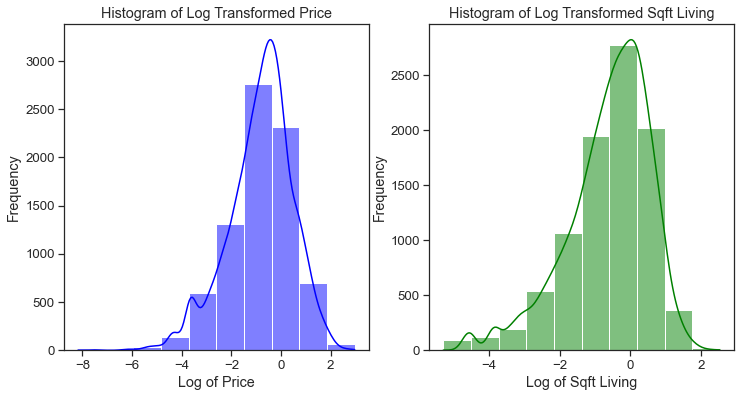

In [68]:
# Apply log transformation
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])

# Plot histograms using Seaborn
plt.figure(figsize=(12, 6))

# Histogram for log_price
plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], kde=True, bins=10, color='blue')
plt.title('Histogram of Log Transformed Price')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')

# Histogram for log_sqft_living
plt.subplot(1, 2, 2)
sns.histplot(df['log_sqft_living'], kde=True, bins=10, color='green')
plt.title('Histogram of Log Transformed Sqft Living')
plt.xlabel('Log of Sqft Living')
plt.ylabel('Frequency')


Based on the simple linear regression model, we can observe that there is a relationship between the price and the sqft_living. However, some prices deviate further away from the line of best fit indicating that there are other factors that affect the prices.
A mutliple regression model can give further insights on factors that affect the prices of the houses.

#### MULTIPLE LINEAR REGRESSION


In [69]:
#Cleaning the columns with missung values and imputing them with the mean
# Calculate the mean values
mean_log_price = df['log_price'].mean()
mean_log_sqft_living = df['log_sqft_living'].mean()

# Fill missing values with the mean
df['log_price'].fillna(mean_log_price, inplace=True)
df['log_sqft_living'].fillna(mean_log_sqft_living, inplace=True)

df.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
grade              0
sqft_above         0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
condition_2        0
condition_3        0
condition_4        0
condition_5        0
log_price          0
log_sqft_living    0
dtype: int64

Splitting the data and building the model

Mean Squared Error: 0.25786115669504145
R-squared: 0.7327587396139582


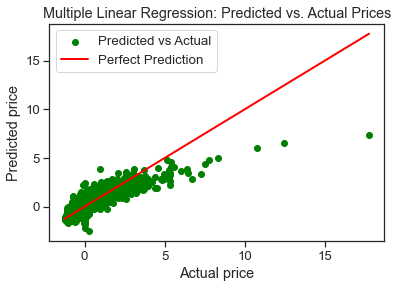

In [70]:

# Define the features and the target
target = 'price'
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Plotting the results
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Multiple Linear Regression: Predicted vs. Actual Prices')
plt.legend()
plt.show()

##### HOMOSCEDASTICITY CHECK

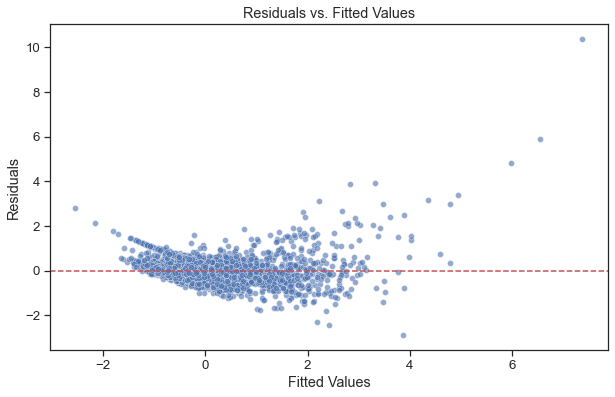

In [ ]:
#calculating residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The scatter plot shows random distribution of residuals around the horizontal line at zero, which indicates homoscedasticity. The spread of residuals shows that the data is unbiased and there is no outliers.

#### NORMALITY TEST
This is to test whether the data follows a normal distribution.

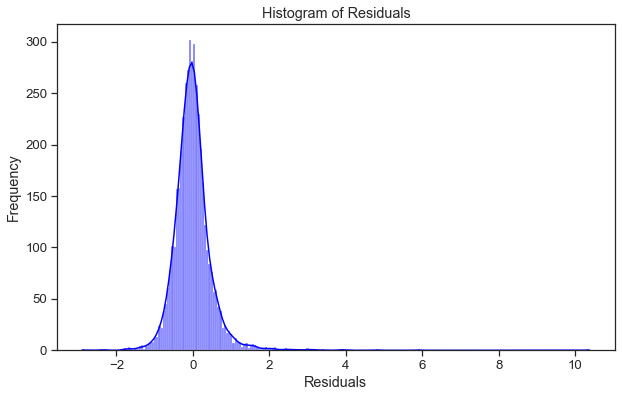

In [ ]:

# Calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


#### MODEL INTERPRETATION.
From the two models, there is a difference in the r_squared values. Comparing the simple regression model and the multiple regression model to determine a better fit, we measure the percentage of variance explained through the r_squared where a higher r_squared represents a better fit. 

In [ ]:
r_squared = 0.493
multiple_r_squared = multiple_model.rsquared

second_model_is_better = multiple_r_squared > r_squared
second_model_is_better

True

The sqft_living has a high correlation to the price meaning that it has a huge impact on the price. However, the model has shown that other factors such as the nummber of floors and grade also have an impact on the price.

#### RECOMMENDATIONS

1. Collect more detailed data on house features like interior renovations and  landscaping to enhance the model's ability to capture the true value of unique house characteristics
2. Collect more detailed data on neighborhood features like crime rates, school quality, and  amenities.
3. Integrate economic factors such as interest rates, employment rates, and income levels since they significantly impact housing markets, and their inclusion can improve model accuracy
4. Ensure the model uses the most recent data available by regularly updating the. Dataset which will help the model remain relevant and accurate in a dynamic housing market
5. Incorporate data from surrounding areas and regions to capture a broader market perspective which can help the model account for regional price differences and market trends.
6. Regular testing and validation help identify weaknesses and areas for improvement, ensuring the model's reliability.

